In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import mean_squared_error

In [2]:
air_passengers = pd.read_csv('airline-passengers.csv')
air_passengers.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [14]:
air_passengers.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [13]:
air_passengers.shape

(144, 2)

In [24]:
air_passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month         144 non-null object
Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [18]:
air_passengers.isnull().sum().sort_values(ascending = False)

Passengers    0
Month         0
dtype: int64

In [23]:
for i in air_passengers.columns:
    if np.dtype(air_passengers[i]).name =='object':
        print(i, ':',sum(air_passengers[i]=='?'))

Month : 0


In [3]:
dt_range = pd.date_range(start = '1/1/1949',end = '31/12/1960',freq = 'MS'  )

In [4]:
air_passengers['TimeIndex'] = pd.DataFrame(dt_range)
air_passengers.head()


,Month,Passengers,TimeIndex
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01


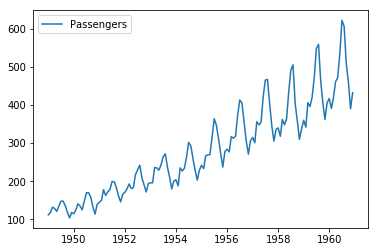

In [5]:
plt.plot(air_passengers.TimeIndex, air_passengers.Passengers)
plt.legend(loc='best')
plt.show()

In [6]:
passengers_avg               = air_passengers.copy()
passengers_avg['avg_forecast'] = air_passengers['Passengers'].mean()



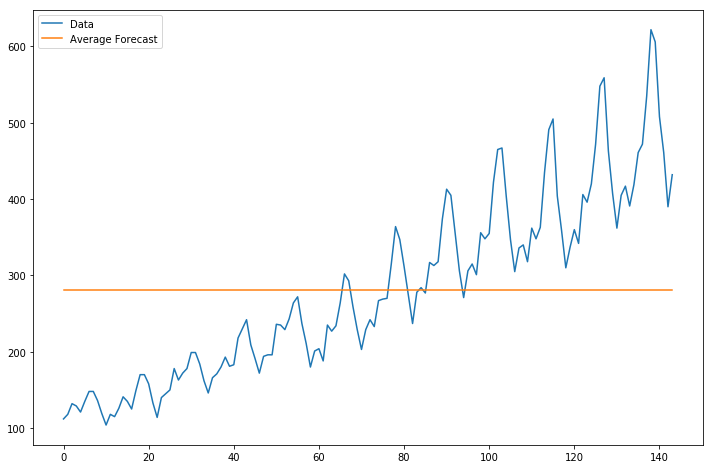

In [7]:
plt.figure(figsize=(12,8))
plt.plot(air_passengers['Passengers'], label='Data')
plt.plot(passengers_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

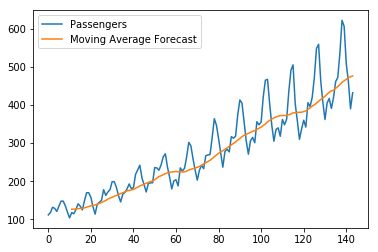

In [8]:
mvg_avg = air_passengers.copy()
mvg_avg['moving_avg_forecast'] =air_passengers['Passengers'].rolling(12).mean()
plt.plot(air_passengers['Passengers'], label='Passengers')
plt.plot(mvg_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [9]:
def MAE(y,yhat):
    diff = np.abs(np.array(y)-np.array(yhat))
    try:
        mae =  round(np.mean(np.fabs(diff)),3)
    except:
        print("Error while calculating")
        mae = np.nan
    return mae

In [10]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.mean(np.abs((y - yhat) / y)) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

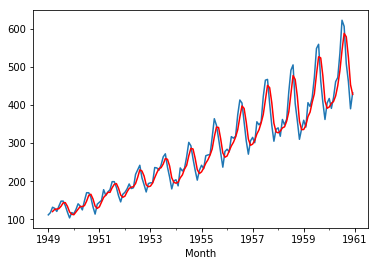

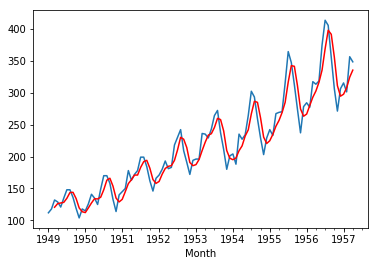

In [11]:
series       =  pd.read_csv('airline-passengers.csv', 
                         header=0, index_col=0, parse_dates=True, squeeze=True) 

# tail rolling average transform
rolling      =  series.rolling(window = 3) # arbitrarily chosen

rolling_mean =  rolling.mean()
series.plot()

rolling_mean.plot(color = 'red')
plt.show()

# Zoomed plot original and transformed dataset
series[:100].plot()
rolling_mean[:100].plot(color = 'red')
plt.show()

In [12]:
y_df = pd.DataFrame( {'Observed':series.values, 'Predicted':rolling_mean})
y_df .dropna(axis = 0, inplace = True)
print(y_df.tail())

rmse = np.sqrt(mean_squared_error(y_df.Observed, y_df.Predicted))
print("\n\n Accuracy measures ")
print('RMSE: %.3f' % rmse)
n = y_df.shape[0]

mae = MAE(y_df.Observed, y_df.Predicted)
print('MAE: %d' % np.float(mae))

mape = MAPE(y_df.Observed, y_df.Predicted)
print('MAPE: %.3f' % np.float(mape))

            Observed   Predicted
Month                           
1960-08-01       606  587.666667
1960-09-01       508  578.666667
1960-10-01       461  525.000000
1960-11-01       390  453.000000
1960-12-01       432  427.666667


 Accuracy measures 
RMSE: 28.099
MAE: 21
MAPE: 7.350
